In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types, define_grid, HEIGHT, plot_multibar_chart, determine_outlier_thresholds_for_var, count_outliers, derive_date_variables, analyse_date_granularity
import seaborn as sns
import numpy as np

In [3]:
fig_path = "../figures/data_profiling/"

In [4]:
df = pd.read_csv('../datasets/class_credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [5]:
print(get_variable_types(df)["symbolic"])

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Type_of_Loan', 'CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


['Month', 'Occupation', 'CreditMix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
There are no numeric variables.
all done


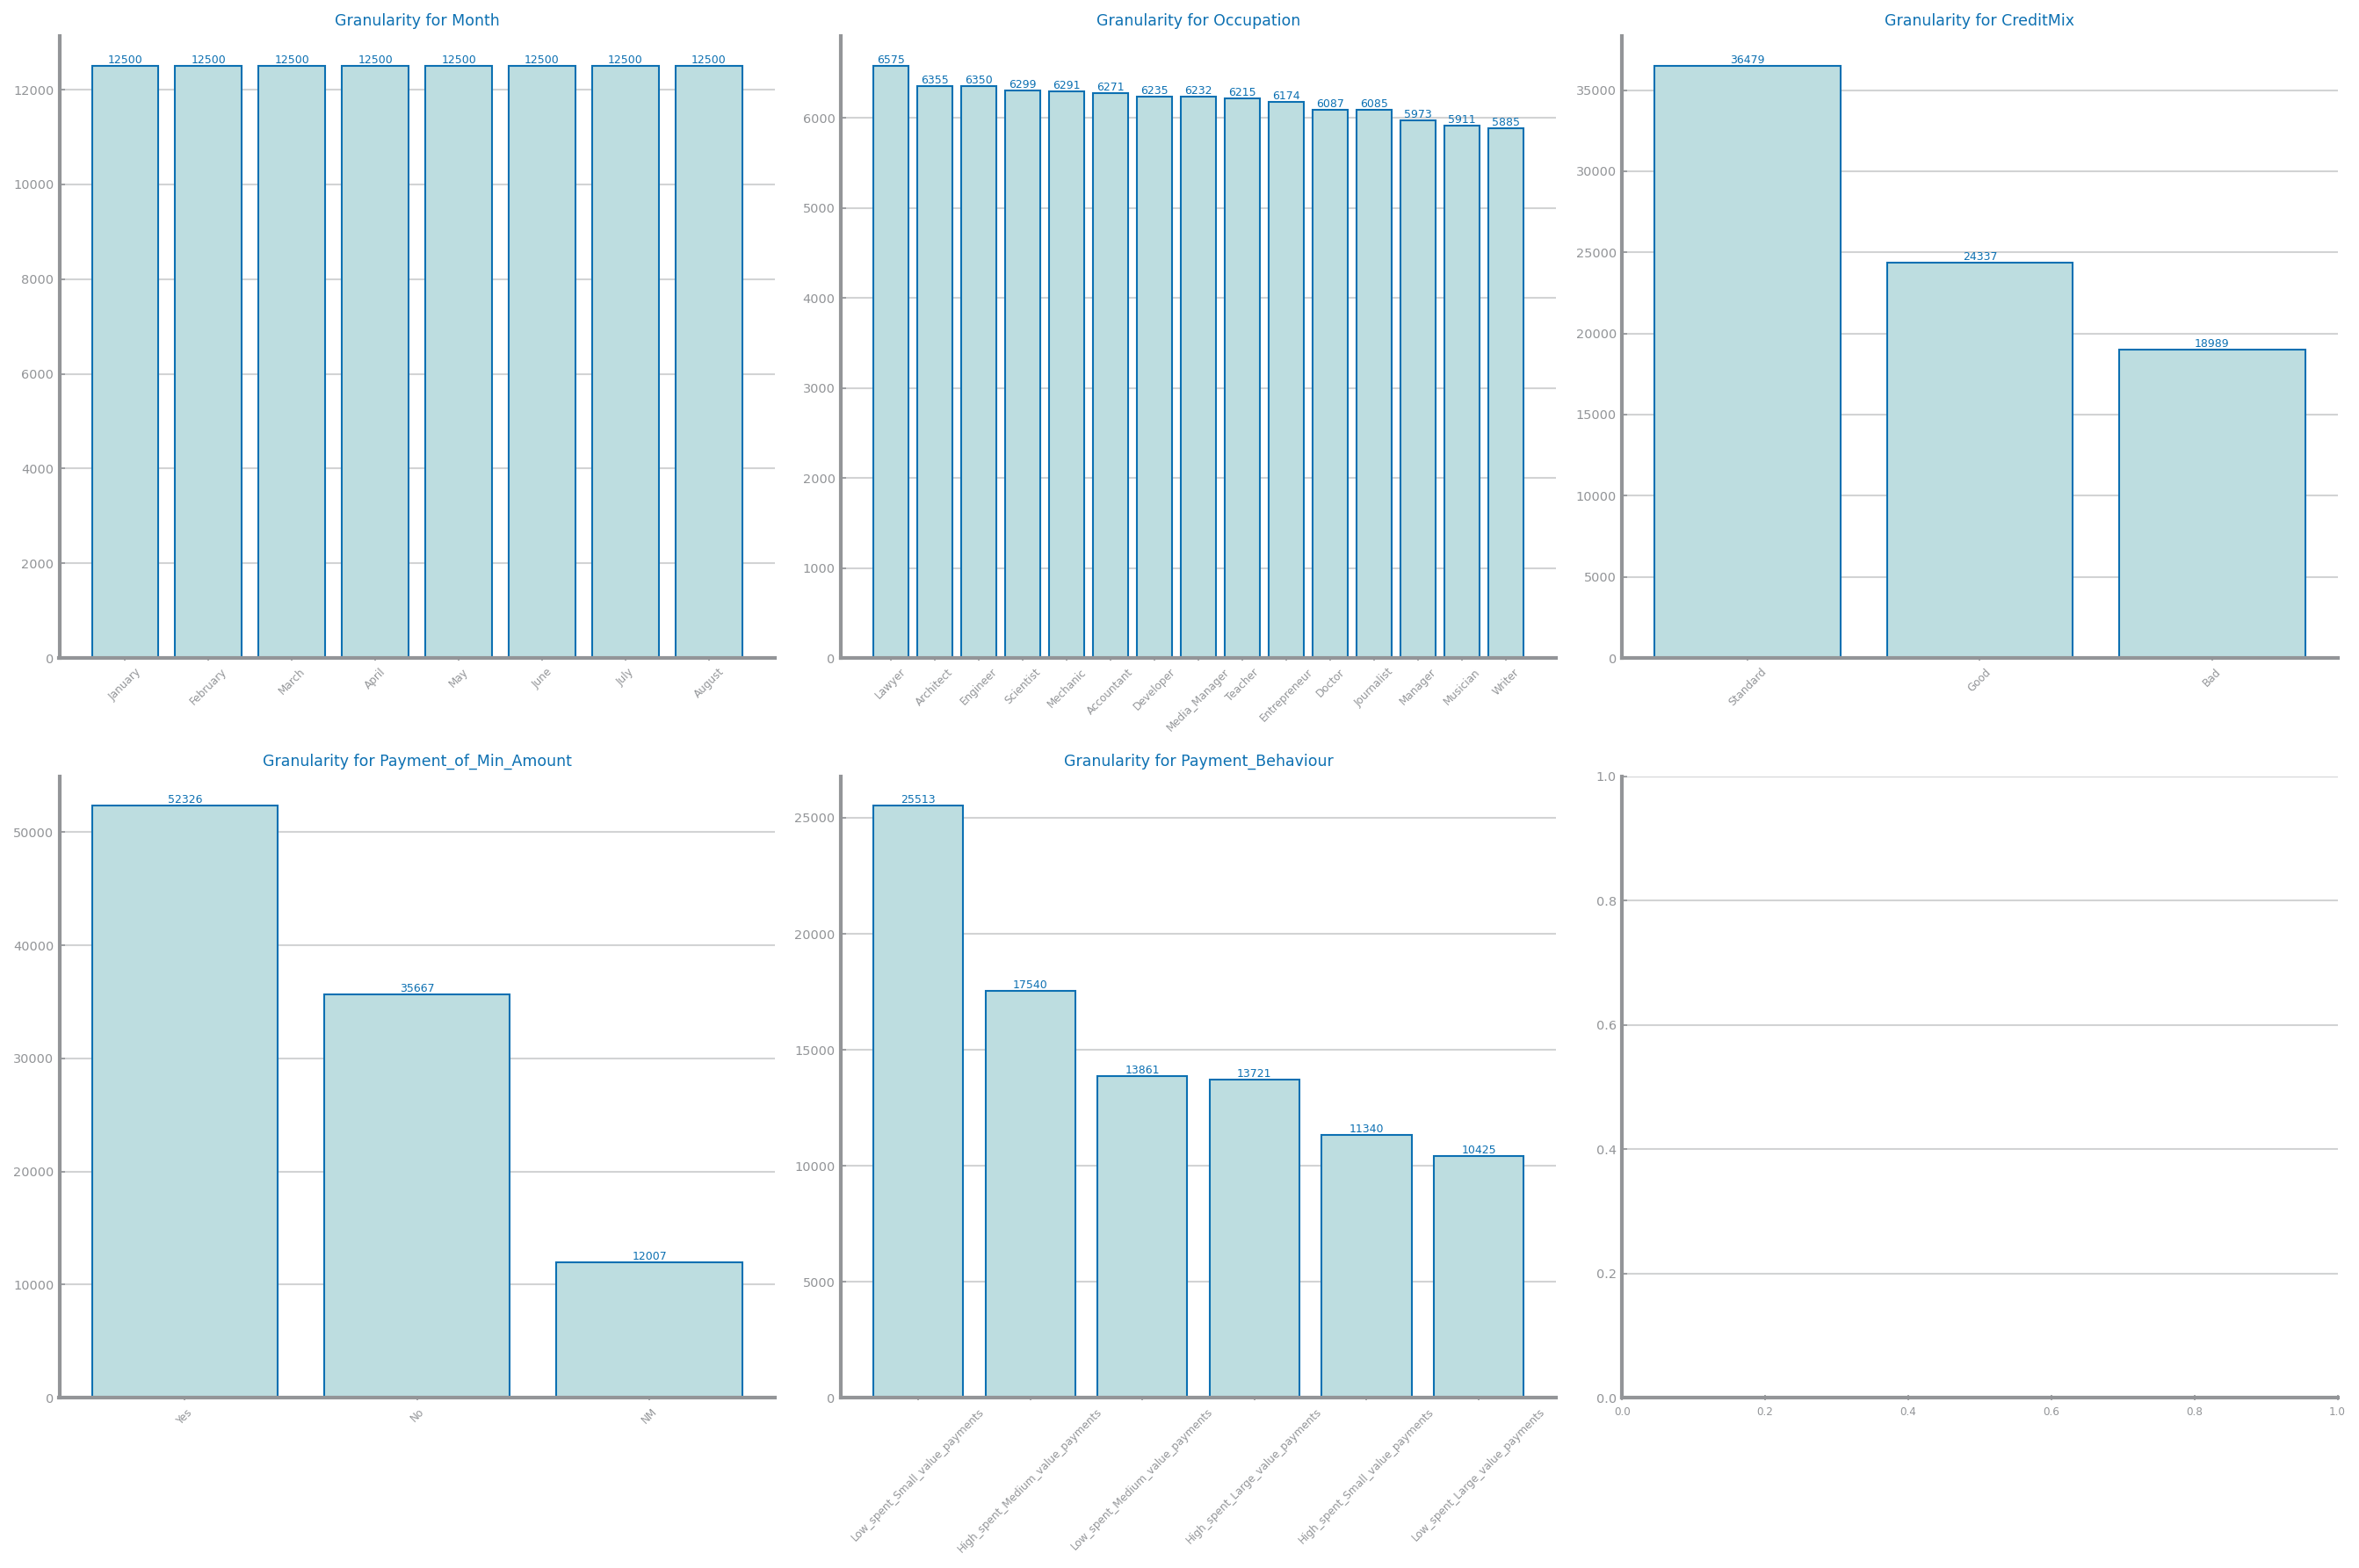

In [23]:
variables_types = get_variable_types(df)
symbolic = variables_types["symbolic"]
substrings_to_remove = ['ID','Type_of_Loan', 'Customer_ID', 'Name', 'Age', 'SSN']

# Using list comprehension to remove items containing any of the substrings
symbolic = [item for item in symbolic if not any(substring in item for substring in substrings_to_remove)]

print(symbolic)
rows, cols = define_grid(len(symbolic))


fig, axs = plt.subplots(
    rows, cols, figsize=(cols * HEIGHT*1.5, rows * HEIGHT*1.5), squeeze=False
)

i, j = 0, 0
for n in range(len(symbolic)):
    value_counts = df[symbolic[n]].value_counts()
    plot_bar_chart(value_counts.index, value_counts.values, ax=axs[i, j])    
    axs[i, j].set_title("Granularity for %s" % symbolic[n])
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
else:
    print("There are no numeric variables.")

print("all done")
plt.tight_layout()
plt.savefig(fig_path+"granulation_Services")